In [2]:

import pandas as pd
import importlib
import pv_profil, lastprofile_VDI4655, try_region, berechnen_ev
importlib.reload(berechnen_ev)
h, w, twe, s = lastprofile_VDI4655.get_jahresenergiebedarf('1984 - 1994', 200, 3, 0)
TRY_region, T_n_aussen = try_region.get_try_t_n_aussen(40599)
df = lastprofile_VDI4655.get_lastprofile(w, s, twe, 200, TRY_region, 3)
pv = pv_profil.get_pv_profil(40599, 2014, 10)

In [3]:
importlib.reload(berechnen_ev)
df_pv = berechnen_ev.mit_pv(df.copy(), pv, True)

In [4]:
importlib.reload(berechnen_ev)
df_pvbs = berechnen_ev.mit_pvbs(df.copy(), pv, 10, 11, True)

In [5]:
importlib.reload(berechnen_ev)
ergebnisse = berechnen_ev.ersparnis_pv(df_pv, 10, 0.358)
berechnen_ev.print_ersparnis(ergebnisse)

Haushaltsstrombedarf in kWh: 4980
EV Strombedarf in kWh: 1994
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 2312
Geladene PV-Strom in Elektroauto in kWh: 350

Netzbezug in kWh: 4662
Einspeisung ins Netz in kWh: 8970

Stromkosten ohne PV in €/a: 2496.78
Stromkosten mit PV in €/a: 1669.0
Einspeisevergütung in €/a: 714.01
Stromkosten Einsparung in €/a: 1541.79


In [6]:
importlib.reload(berechnen_ev)
ergebnisse_bs = berechnen_ev.ersparnis_pvbs(df_pvbs, 10, 0.358)
berechnen_ev.print_ersparnis(ergebnisse_bs)

Haushaltsstrombedarf in kWh: 4980
EV Strombedarf in kWh: 1994
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 4992
Geladene PV-Strom in Batteriespeicher in kWh: 2810
Geladene PV-Strom in Elektroauto in kWh: 219
Geladene BS-Strom in Elektroauto in kWh: 423

Netzbezug in kWh: 1981
Einspeisung ins Netz in kWh: 6173

Stromkosten ohne PV in €/a: 2496.78
Stromkosten mit PV & BS in €/a: 709.2
Einspeisevergütung in €/a: 491.37
Stromkosten Einsparung in €/a: 2278.95


## Mit HEMS

In [51]:
importlib.reload(berechnen_ev)
df_hems, df_ohne = berechnen_ev.mit_hems(df.copy(), pv, True)
ergebnisse_hems = berechnen_ev.ersparnis_hems(df_hems, df_ohne, 10, 0.358)
berechnen_ev.print_ersparnis_hems(ergebnisse_hems)

Haushaltsstrombedarf in kWh: 4980
EV Strombedarf in kWh: 1891
Gefahrene km: 10054
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 3817
Geladene PV-Strom in Elektroauto in kWh: 1854

Mit HEMS
Netzbezug in kWh: 3055
Einspeisung ins Netz in kWh: 7465
Einspeisevergütung in €/a: 594.21
Stromkosten mit PV & EV in €/a: 1093.69

Ohne HEMS
Netzbezug in kWh: 4662
Einspeisung ins Netz in kWh: 8970
Einspeisevergütung in €/a: 714.01
Stromkosten in €/a: 1669.0

Einsparung mit HEMS
Stromkosten Einsparung in €/a: 455.51


In [52]:
negative_indices = df_hems.index[df_hems['netzbezug'] < 0]

# Ausgabe der Indizes
print("Indizes, bei denen 'netzbezug' < 0 ist:", negative_indices)

Indizes, bei denen 'netzbezug' < 0 ist: DatetimeIndex([], dtype='datetime64[ns]', name='Zeit', freq='h')


In [53]:
distanz = df_hems.loc[df_hems['ev distanz'] > 0, 'ev distanz']

# Berechne den Mittelwert der gefilterten Distanz
mean_distanz = distanz.mean()
mean_distanz

31.71678449754449

In [54]:
df_hems['ev distanz'].sum()

10054.220685721604

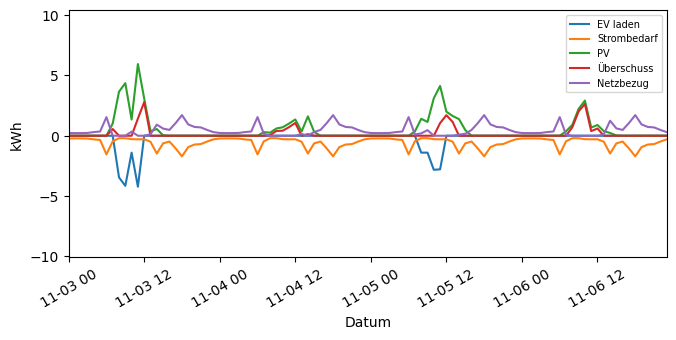

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

plt.plot(df_hems.index, -df_hems['EV Ladung'], label = "EV laden")   
plt.plot(df_hems.index, -df_hems['Strombedarf'], label = "Strombedarf")
plt.plot(df_hems.index, df_hems['PV Ertrag'], label = "PV")
plt.plot(df_hems.index, df_hems['überschuss'], label = "Überschuss")
plt.plot(df_hems.index, df_hems['netzbezug'], label = "Netzbezug")

plt.xlabel('Datum', fontsize=10)
plt.ylabel('kWh', fontsize=10)
plt.legend(fontsize = 7, loc = 'best')

plt.xticks(rotation=30, fontsize=10)
plt.xlim(pd.Timestamp('2014-11-03 00:00:00'), pd.Timestamp('2014-11-06 23:00:00')) 
plt.show()

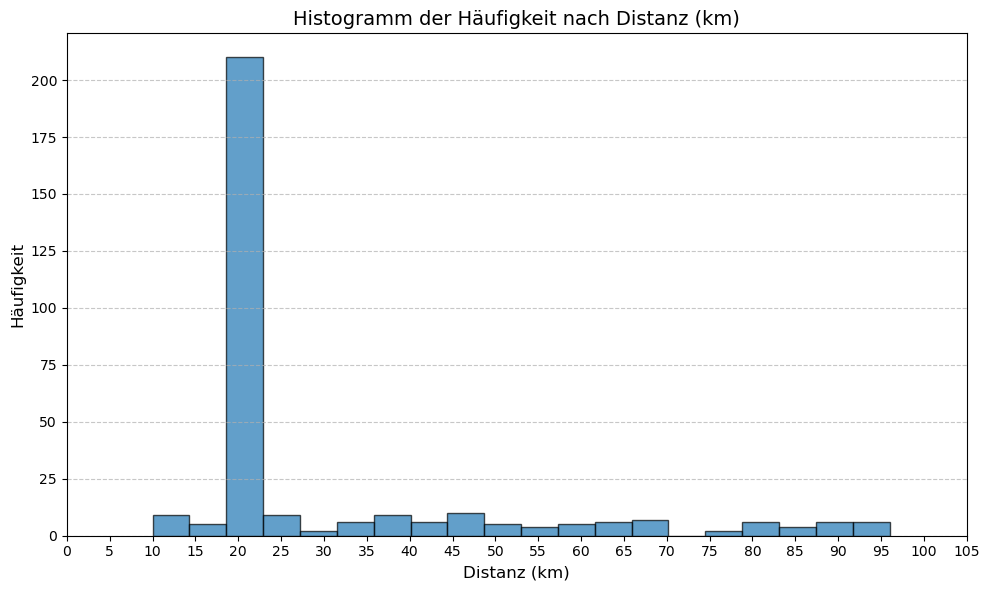

In [56]:
import matplotlib.pyplot as plt

# Daten filtern: Nur Werte, bei denen 'ev distanz' > 0 ist
filtered_data = df_hems[df_hems['ev distanz'] > 0]

# Erstelle das Histogramm für die Spalte 'ev distanz'
plt.figure(figsize=(10, 6))
plt.hist(filtered_data['ev distanz'], bins=20, edgecolor='black', alpha=0.7)

# Titel und Achsenbeschriftungen
plt.title('Histogramm der Häufigkeit nach Distanz (km)', fontsize=14)
plt.xlabel('Distanz (km)', fontsize=12)
plt.ylabel('Häufigkeit', fontsize=12)

# Optionale Anpassung der X-Achse
plt.xticks(range(0, int(filtered_data['ev distanz'].max()) + 10, 5))

# Raster hinzufügen
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Diagramm anzeigen
plt.show()


## HEMS und BS

In [49]:
importlib.reload(berechnen_ev)
df_hems_bs, df_bs_ohne = berechnen_ev.mit_hems_bs(df.copy(), pv, 10, True)
ergebnisse_hems_bs = berechnen_ev.ersparnis_hems_bs(df_hems_bs, df_bs_ohne, 10, 0.358)
berechnen_ev.print_ersparnis_hems(ergebnisse_hems_bs)

Haushaltsstrombedarf in kWh: 4980
EV Strombedarf in kWh: 1675
Gefahrene km: 8982
Jahresertrag in kWh: 11282
Eigenverbrauch in kWh: 5943
Geladene PV-Strom in Batteriespeicher in kWh: 2324
Geladene PV-Strom in Elektroauto in kWh: 1657
Geladene BS-Strom in Elektroauto in kWh: 18

Mit HEMS
Netzbezug in kWh: 802
Einspeisung ins Netz in kWh: 5242
Stromkosten mit PV, EV & BS in €/a: 287.12
Einspeisevergütung in €/a: 417.26

Ohne HEMS
Netzbezug in kWh: 2118
Einspeisung ins Netz in kWh: 6320
Stromkosten in €/a: 758.24
Einspeisevergütung in €/a: 503.07

Einsparung mit HEMS
Stromkosten Einsparung in €/a: 385.31


In [48]:
df_ohne['ev distanz'].sum()

10440.0